<h6 style= 'color: green'>   
- Это датасет, содержащий информацию о 1000 клиентах банка, которые подавали заявки на кредит. 
Для каждого клиента есть 20 переменных, таких как сумма кредита, срок кредита, цель кредита, возраст, пол, доход, семейное положение и т.д. Кроме того, для каждого клиента есть метка, является ли он хорошим или плохим кредитным риском.
Цель анализа этого датасета - построить модель, которая может предсказать, какой клиент будет надежным заемщиком, а какой нет, на основе его профиля <h6>

In [25]:
# импортируем необходимые библиотеки
import pandas as pd # для работы с данными в виде таблиц
from ydata_profiling import ProfileReport # для создания отчета о данных
from sklearn.preprocessing import LabelEncoder # для преобразования категориальных признаков в числовые
import seaborn as sns # для построения красивых и информативных графиков
import matplotlib.pyplot as plt # для настройки параметров визуализации
%matplotlib inline


In [27]:
df = pd.read_csv('german_credit_data.csv')

In [29]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Признаки:
- Unnamed: 0 - Неименованный: 0 (это может быть индекс или идентификатор записи)
- Age - Возраст (в годах)
- Sex - Пол (мужской или женский)
- Job - Работа (уровень квалификации от 0 до 3)
- Housing - Жилье (собственное, арендованное или бесплатное)
- Saving accounts - Сберегательные счета (мало, средне, достаточно или богато)
- Checking account - Расчетный счет (мало, средне, достаточно или нет)
- Credit amount - Сумма кредита (в марках)
- Duration - Срок (в месяцах)
- Purpose - Цель (автомобиль, образование, мебель, радио/телевизор, домашние принадлежности, ремонт, отпуск, бизнес или другое)


In [31]:
profile = ProfileReport(df, title="Profiling Report")

profile = ProfileReport(df, title="Profiling Report")
- создает отчет о данных, содержащихся в датафрейме df, и присваивает его переменной profile.
Отчет имеет заголовок "Profiling Report" и содержит различную информацию и визуализации о данных, такие как:
- Обзор датафрейма: общие сведения о датафрейме, такие как количество строк, столбцов, пропущенных значений, дубликатов, объем памяти и т.д.
- Анализ каждого признака: подробная статистика и графики для каждого столбца датафрейма, в зависимости от его типа данных (категориальный, числовой, даты, текст и т.д.)
- Корреляции между признаками: матрицы и тепловые карты, показывающие степень линейной или ранговой связи между числовыми признаками
- Анализ пропущенных значений: таблицы и графики, показывающие распределение и взаимосвязь пропущенных значений в датафрейме
- Анализ дубликатов: таблица, показывающая количество и процент дублированных строк в датафрейме

Теоретическая справка:
- Мы использовали библиотеку ydata_profiling, которая является высокоуровневой библиотекой для анализа данных и создания отчетов. Эта библиотека позволяет автоматизировать и стандартизировать процесс исследовательского анализа данных в одну строку кода. 
- Вы можете отобразить ваш отчет в виде HTML-страницы в ячейке Jupyter Notebook, используя функцию profile.to_notebook_iframe(). Вы также можете экспортировать ваш отчет в разные форматы, такие как html и json, используя функции profile.to_file() и profile.to_json(). Вы можете узнать больше об этих функциях в [документации ydata_profiling]


In [33]:
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

profile.to_notebook_iframe() - это функция, которая позволяет отобразить отчет о данных, созданный с помощью библиотеки ydata_profiling, в виде HTML-страницы в ячейке Jupyter Notebook. Это удобный способ просмотреть и поделиться результатами анализа данных в интерактивной среде.
- Из анализа следует:
- Поле Unnamed: 0 содержит только уникальные значения, поэтому его выкинем (это как id только уникальные значения).
- Пустые значения в Saving accounts (18%)
Пропущенные значения в признаке Saving accounts обозначены словом MISSING в верхней части таблицы. Также в таблице указано, сколько пропущенных значений в этом признаке (Missing) и какой процент они составляют от общего числа записей (Missing %). В вашем случае, в признаке Saving accounts есть 183 пропущенных значения, что составляет 18.3% от всего датасета. Это означает, что почти каждый пятый заемщик не указал, какой сберегательный счет у него есть.
- Пустые значения в Checking acoount (39%) заполним категориальным значением unknown
 это категориальный признак, который описывает, какой расчетный счет имеет заемщик. В этом признаке есть три уникальных значения: little, moderate и rich, которые показывают, насколько хорошо заемщик управляется со своими финансами. В этом признаке также есть много пропущенных значений: 394 или 39.4% от всего датасета. Это означает, что почти каждый второй заемщик не указал, какой расчетный счет у него есть. Это может быть проблемой, если вы хотите использовать этот признак для построения модели машинного обучения, которая предсказывает кредитный риск.
- Duration (продолжительность выплат, в месяцах) имеет высокую корреляцию с Credit amount размером кредита. Что, вообщем-то, ожидаемо. Поэтому поле Duration выкинем.
Теоритическая справка: Корреляция - это статистическая мера, которая показывает, насколько сильно два признака изменяются вместе. Корреляция может быть положительной, отрицательной или нулевой. Положительная корреляция означает, что признаки растут или уменьшаются вместе, отрицательная корреляция означает, что признаки движутся в противоположных направлениях, а нулевая корреляция означает, что признаки не связаны между собой.
В вашем случае, вы выбрали способ визуализации Table, который показывает корреляции в виде числовой таблицы. Каждая ячейка таблицы содержит коэффициент корреляции между двумя признаками, который может варьироваться от -1 до 1. Чем ближе коэффициент к 1 или -1, тем сильнее корреляция, а чем ближе к 0, тем слабее корреляция. Например, мы можем видеть, что признаки Credit amount и Duration имеют корреляцию 0.625, что означает, что они положительно связаны, и чем больше сумма кредита, тем больше срок его погашения.
- Категориальные признаки закодируем с помощью LabelEncoder

In [35]:
# Создаем новый датафрейм X, который содержит все признаки из исходного датафрейма df, кроме двух: Unnamed: 0 и Duration
X = df.drop(columns=['Unnamed: 0', 'Duration'], axis=1)

In [37]:
# Заменяем пропущенные значения в столбцах Saving accounts и Checking account на строку 'unknow'
# Используем метод fillna из библиотеки pandas, указывая параметр inplace=True, чтобы изменить исходный датафрейм
# Выбираем строку 'unknow' в качестве значения для заполнения, потому что не хотим использовать нули или средние значения, которые могут исказить распределение данных или ввести смещение в модель
X['Saving accounts'].fillna('unknow', inplace=True)
X['Checking account'].fillna('unknow', inplace=True)

In [39]:
# Создаем список категориальных столбцов, выбирая из датафрейма X только те столбцы, которые имеют тип данных object
# Используем метод select_dtypes из библиотеки pandas, указывая параметр include=['object']
# Преобразуем результат в список с помощью функции list
categorical_columns = list(X.select_dtypes(include=['object']).columns)

# Выводим список категориальных столбцов на экран с помощью функции print
print(categorical_columns)


['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


In [41]:
# Создаем словарь encoders, который будет хранить объекты LabelEncoder для каждого категориального столбца
encoders = {}

# Проходим по списку категориальных столбцов в цикле for
for column in categorical_columns:
    # Создаем новый объект LabelEncoder и присваиваем его переменной le
    le = LabelEncoder()
    # Применяем LabelEncoder к категориальному столбцу в датафрейме X, используя метод fit_transform
    # Заменяем категориальные значения на числовые метки, соответствующие их классам
    X[column] = le.fit_transform(X[column])
    # Сохраняем объект LabelEncoder в словаре encoders под ключом, равным названию столбца
    encoders[column] = le
    
# Выводим первые пять строк датафрейма X на экран с помощью метода head
X.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Purpose
0,67,1,2,1,4,0,1169,5
1,22,0,2,1,0,1,5951,5
2,49,1,1,1,0,3,2096,3
3,45,1,2,0,0,0,7882,4
4,53,1,2,0,0,0,4870,1


In [43]:
# Выводим информацию
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int32
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int32
 4   Saving accounts   1000 non-null   int32
 5   Checking account  1000 non-null   int32
 6   Credit amount     1000 non-null   int64
 7   Purpose           1000 non-null   int32
dtypes: int32(5), int64(3)
memory usage: 43.1 KB


Посмотрим на распределение данных в наших числовых признаках, их всего 2: Credit amount, Age.
Есть ли выбросы?

In [45]:
# Определяем функцию plot_distribution, которая принимает датафрейм X и название столбца column
def plot_distribution(X, column):
    # Создаем фигуру и два подграфика в одной строке с помощью plt.subplots
    # Указываем размер фигуры и относительную ширину подграфиков с помощью gridspec_kw
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
    # Рисуем ящиковую диаграмму для столбца column в датафрейме X на первом подграфике с помощью sns.boxplot
    sns.boxplot(data=X, x=column, ax=ax1)
    # Рисуем гистограмму для столбца column в датафрейме X на втором подграфике с помощью sns.histplot
    sns.histplot(data=X, x=column, ax=ax2)
    # Улучшаем расположение подграфиков в фигуре с помощью f.tight_layout
    f.tight_layout()


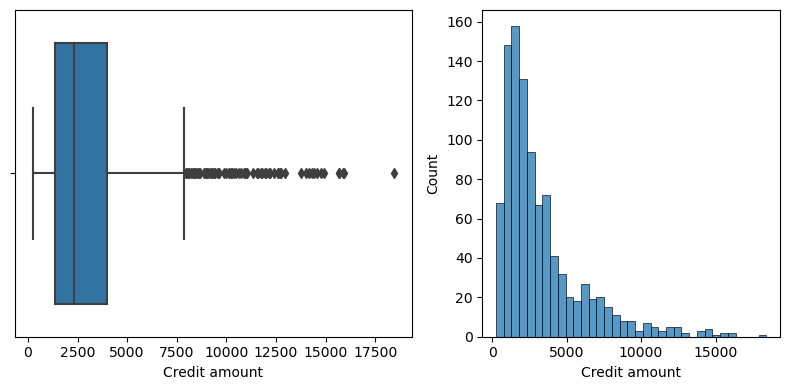

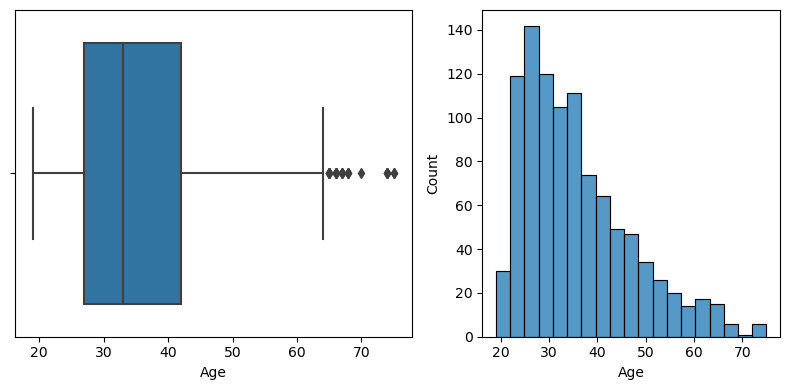

In [47]:
%matplotlib inline
# Для того,чтобы графики отображались непосредственно в ячейках.

# Проходим по списку столбцов ['Credit amount', 'Age'] в цикле for
for column in ['Credit amount', 'Age']:
    # Вызываем функцию plot_distribution, которая принимает датафрейм X и название столбца column
    # Эта функция рисует ящиковую диаграмму и гистограмму для столбца column, чтобы показать его распределение
    plot_distribution(X, column)


Из графиков, построенных с помощью функции plot_distribution, можно сделать следующие выводы:
- Признак Credit amount имеет сильно скошенное вправо распределение, то есть большинство значений лежат в левой части графика, а некоторые очень большие значения выступают как выбросы. Это означает, что большинство заемщиков берут небольшие или средние суммы кредита, а некоторые берут очень большие суммы. 
- Ящик с усами показывает, что есть много значений, которые выходят за пределы усов ящика, что указывает на наличие выбросов.
- Признак Age имеет более симметричное распределение, но все же с небольшим скошенностью вправо. Это означает, что большинство заемщиков имеют средний или молодой возраст, а некоторые имеют более старший возраст. Ящиковая диаграмма показывает, что медианное значение Age равно 33 года, а среднее значение равно 35.54 года. Минимальное значение равно 19 лет, а максимальное значение равно 75 лет. Также видно, что есть несколько значений, которые выходят за пределы усов ящика, что указывает на наличие выбросов.

## Масштабирование признаков

Важно привести признаки к общей шкале, так как любой расчет кластеров основан на вычислении расстояния между точками. И масштаб признаков влияет на метрику. Если признаки не отмасштабировать, то алгоритмы могут оценивать признаки с большим множителем, как важные, даже если они на самом деле не являются важными в определении кластера.

Нужно выбрать [правильный скейлер](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#compare-the-effect-of-different-scalers-on-data-with-outliers).

Теоритическая справка:
- Масштабирование признаков - это процесс приведения значений разных признаков к одной шкале или диапазону. Это делается для того, чтобы уравнять влияние разных признаков на результаты анализа данных или моделирования. Например, если один признак измеряется в метрах, а другой в километрах, то без масштабирования признак в километрах будет доминировать над признаком в метрах, так как его значения будут в тысячу раз больше. Масштабирование признаков помогает избежать таких искажений и сделать признаки сопоставимыми между собой.
Существует много способов масштабирования признаков, но наиболее популярными являются:
- Минимакс-масштабирование (Min-max scaling) - это линейное преобразование признаков, которое переводит их значения в диапазон от 0 до 1. Для этого из каждого значения вычитается минимальное значение признака, а затем делится на разность между максимальным и минимальным значением признака. Этот метод подходит для признаков, которые имеют равномерное распределение и не содержат сильных выбросов.
- Стандартизация (Standardization) - это преобразование признаков, которое делает их значения центрированными вокруг нуля и с единичным стандартным отклонением. Для этого из каждого значения вычитается среднее значение признака, а затем делится на стандартное отклонение признака. Этот метод подходит для признаков, которые имеют нормальное распределение и содержат выбросы, так как он уменьшает их влияние.
- Для масштабирования признаков в Python можно использовать библиотеку scikit-learn, которая предоставляет различные классы для этой цели, такие как MinMaxScaler, StandardScaler, RobustScaler и другие. 

В этом датасете из 10 признаков, только 1 признак содержит непрерывные значения.

Скейлеры, которые мы можем использовать - MinMaxScaler и StandardScaler, если он хорошо сможет сжать пространства Credit amount и Age до сопоставимых шкал.

- StandardScaler не подходит для категориальных признаков, так как он предполагает, что данные имеют нормальное распределение, а категориальные признаки обычно имеют дискретное распределение.
- StandardScaler также чувствителен к выбросам, которые могут исказить среднее и стандартное отклонение. 
- MinMaxScaler лучше подходит для категориальных признаков, так как он сохраняет их оригинальную форму и масштабирует их в заданный диапазон, например, [0, 1]. 
- Однако MinMaxScaler также может сжимать все значения в узком диапазоне, если в данных есть выбросы. В этом случае вы можете использовать 
- RobustScaler, который устойчив к выбросам и масштабирует данные с помощью медианы и межквартильного размаха.

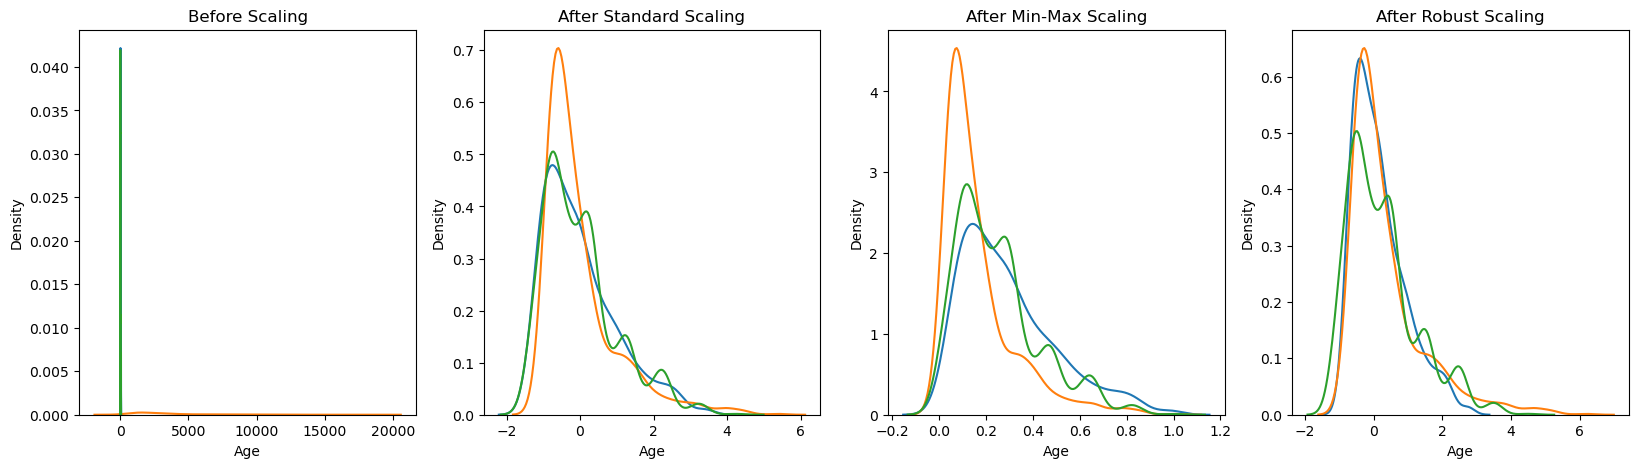

In [49]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

# загружаем наши данные из файла german_credit.csv
df = pd.read_csv('german_credit_data.csv')

# указываем категориальные признаки в датасете
cat_features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
# указываем числовые признаки в датасете
num_features = ['Age', 'Credit amount', 'Duration']

# создаем объекты масштабаторов
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# масштабируем числовые признаки с помощью разных масштабаторов
std_scaled = std_scaler.fit_transform(df[num_features])
minmax_scaled = minmax_scaler.fit_transform(df[num_features])
robust_scaled = robust_scaler.fit_transform(df[num_features])

# преобразуем масштабированные данные в датафреймы с теми же именами столбцов
std_scaled = pd.DataFrame(std_scaled, columns=num_features)
minmax_scaled = pd.DataFrame(minmax_scaled, columns=num_features)
robust_scaled = pd.DataFrame(robust_scaled, columns=num_features)

# создаем фигуру с четырьмя подграфиками
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))

# задаем заголовки для подграфиков
axes[0].set_title('Before Scaling')
axes[1].set_title('After Standard Scaling')
axes[2].set_title('After Min-Max Scaling')
axes[3].set_title('After Robust Scaling')

# для каждого числового признака строим графики распределения на разных подграфиках
for i, feature in enumerate(num_features):
    sns.kdeplot(df[feature], ax=axes[0], color='C'+str(i))
    sns.kdeplot(std_scaled[feature], ax=axes[1], color='C'+str(i))
    sns.kdeplot(minmax_scaled[feature], ax=axes[2], color='C'+str(i))
    sns.kdeplot(robust_scaled[feature], ax=axes[3], color='C'+str(i))

# показываем фигуру
plt.show()


Можно масштабировать числовые признаки в датасете с помощью разных методов: стандартного, минимаксного и робастного. Масштабирование признаков может быть полезным для улучшения работы некоторых алгоритмов машинного обучения, таких как линейная регрессия, логистическая регрессия, k-ближайших соседей и k-средних. Масштабирование также может помочь визуализировать распределение признаков и сравнить их между собой.
- Выше показано, как разные методы масштабирования влияют на распределение признаков. На графиках видно, что:
- Стандартное масштабирование приводит к тому, что среднее значение каждого признака становится равным нулю, а стандартное отклонение - единице. Это означает, что признаки имеют одинаковый масштаб, но сохраняют свою форму распределения. Однако, стандартное масштабирование чувствительно к выбросам, то есть аномальным значениям, которые сильно отклоняются от среднего.
- Минимаксное масштабирование приводит к тому, что минимальное значение каждого признака становится равным нулю, а максимальное - единице. Это означает, что признаки имеют одинаковый диапазон значений, но могут иметь разную форму распределения. Минимаксное масштабирование также чувствительно к выбросам, которые могут сжимать остальные значения в узкий интервал.
- Робастное масштабирование приводит к тому, что медиана каждого признака становится равной нулю, а межквартильный размах - единице. Это означает, что признаки имеют одинаковый масштаб, основанный на более устойчивых к выбросам статистиках, чем среднее и стандартное отклонение. Робастное масштабирование менее чувствительно к выбросам, но может искажать нормальное распределение признаков.
Да так можно использовать разные методы масштабирования признаков в зависимости от целей анализа и моделирования данных. 
Мы также можем  визуализировать результаты масштабирования с помощью графиков распределения, которые помогают сравнить признаки до и после масштабирования.

In [51]:
# импортируем библиотеку sklearn.preprocessing, которая содержит функции для масштабирования данных
from sklearn.preprocessing import RobustScaler

# создаем объект робастного масштабатора, который удаляет медиану и масштабирует данные по межквартильному размаху
robust_scaler = RobustScaler()

# выбираем признаки, которые хотим масштабировать, например, 'Credit amount' и 'Age'
features = ['Credit amount', 'Age']

# применяем робастный масштабатор к выбранным признакам и получаем масштабированные данные в виде массива
scaled_data = robust_scaler.fit_transform(df[features])

# преобразуем масштабированные данные в датафрейм с теми же именами столбцов
scaled_data = pd.DataFrame(scaled_data, columns=features)

# выводим первые пять строк масштабированных данных
scaled_data.head()


,Credit amount,Age
0,-0.441354,2.266667
1,1.393114,-0.733333
2,-0.085739,1.066667
3,2.133883,0.800000
4,0.978421,1.333333


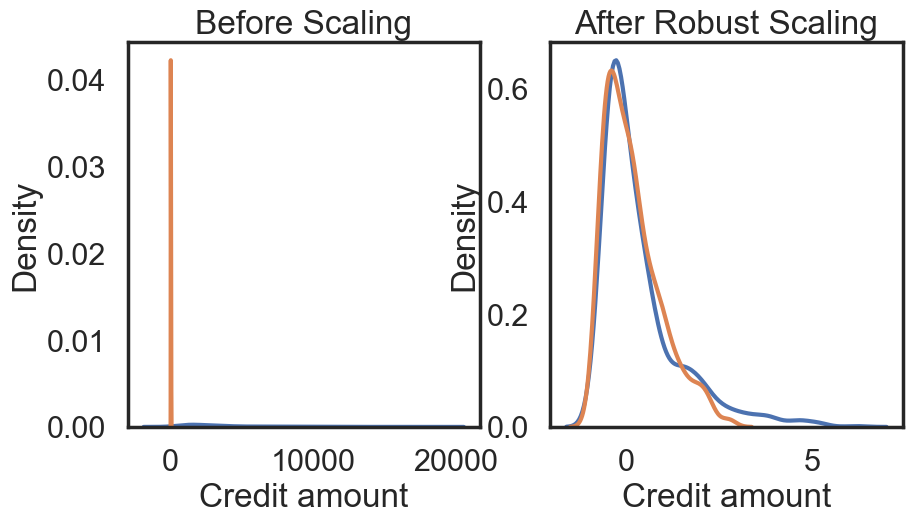

In [53]:
# импортируем библиотеки matplotlib и seaborn для создания графиков
import matplotlib.pyplot as plt
import seaborn as sns

# создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# задаем заголовки для подграфиков
axes[0].set_title('Before Scaling')
axes[1].set_title('After Robust Scaling')

# для каждого признака, который мы масштабировали, строим графики распределения на разных подграфиках
for i, feature in enumerate(features):
    # на первом подграфике показываем распределение признака до масштабирования
    sns.kdeplot(df[feature], ax=axes[0], color='C'+str(i))
    # на втором подграфике показываем распределение признака после масштабирования
    sns.kdeplot(scaled_data[feature], ax=axes[1], color='C'+str(i))

# показываем фигуру


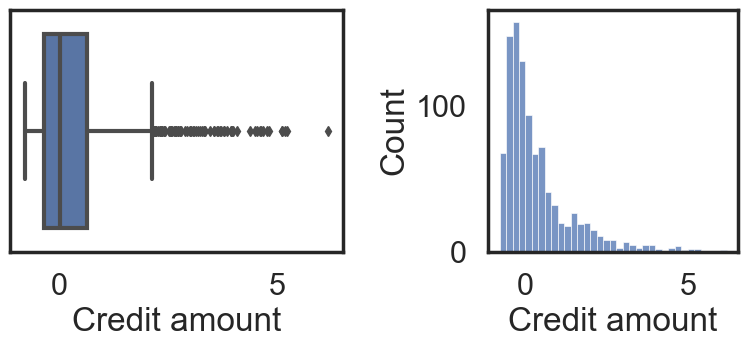

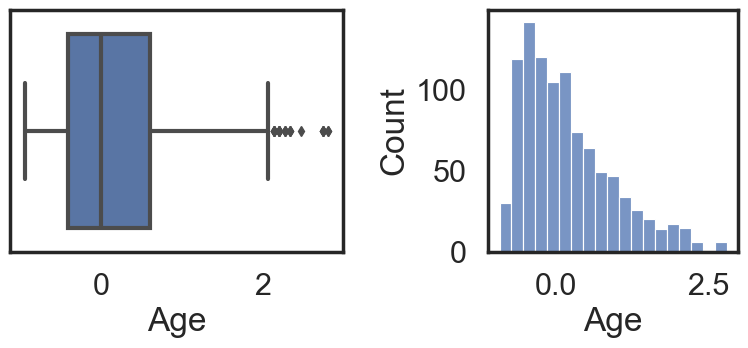

In [55]:
# импортируем библиотеку для масштабирования
from sklearn.preprocessing import RobustScaler

# создаем объект робастного масштабатора, который удаляет медиану и масштабирует данные по межквартильному размаху
robust_scaler = RobustScaler()

# выбираем признаки, которые хотим масштабировать, например, 'Credit amount' и 'Age'
features = ['Credit amount', 'Age']

# применяем робастный масштабатор к выбранным признакам и получаем масштабированные данные в виде массива
scaled_data = robust_scaler.fit_transform(df[features])

# преобразуем масштабированные данные в датафрейм с теми же именами столбцов
scaled_data = pd.DataFrame(scaled_data, columns=features)

# строим графики распределения для масштабированных признаков
for column in features:
    # используем функцию plot_distribution, которая принимает датафрейм и имя столбца, по которому строит график
    # функция plot_distribution возвращает объект matplotlib.axes.Axes, который можно настроить по желанию
    # функция plot_distribution использует библиотеку seaborn для создания гистограммы с наложенной кривой плотности
    # функция plot_distribution также показывает основные статистики распределения, такие как среднее, медиана, мода и квартили
    ax = plot_distribution(scaled_data, column)
    # добавляем заголовок для каждого графика
    #не добавляем вызывается ошибка, у него название отсутствут - ax.plt_title(f'Показываем {column} after Robust Scaling')
    # показываем график
    plt.show()


Теперь посмотрим все скейлеры

### StandartScaler

In [ ]:
# Вызываем Скайлер
from sklearn.preprocessing import StandardScaler

In [ ]:
# импортируем модуль pandas для работы с табличными данными
import pandas as pd
# импортируем модуль sklearn.preprocessing для использования функции StandardScaler
from sklearn.preprocessing import StandardScaler

# создаем объект scaler класса StandardScaler
scaler = StandardScaler()
# применяем функцию fit_transform к независимым переменным X, чтобы стандартизировать их
# результат преобразуем в датафрейм pandas с теми же именами столбцов, что и в X
X_scaled_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# выводим на экран стандартизированные данные
X_scaled_std


In [ ]:
# цикл по двум столбцам датафрейма X_scaled_std: 'Credit amount' и 'Age'
for column in ['Credit amount', 'Age']:
    plot_distribution(X_scaled_std, column)  # Вызываем функцию plot_distribution, передавая ей датафрейм и имя столбца, по которому хотим построить график.

In [ ]:
# Импортируем библиотеку matplotlib.pyplot для создания графиков
import matplotlib.pyplot as plt
# Импортируем библиотеку seaborn для создания статистических графиков
import seaborn as sns

# Устанавливаем размер фигуры для графика (ширина, высота в дюймах)
plt.figure(figsize=(10,10))
# Создаем горизонтальный boxplot для датафрейма X_scaled_std
# orient='h' указывает на горизонтальное расположение ящиков
sns.boxplot(data=X_scaled_std, orient='h');


Функция sns.boxplot(data=X_scaled_std, orient='h') создает boxplot (ящичковую диаграмму), которая показывает распределение данных в датафрейме X_scaled_std. Параметр orient='h' указывает, что ящики должны быть расположены горизонтально. Boxplot предоставляет визуальное представление о медиане, квартилях, минимальных и максимальных значениях, а также выбросах в данных1

### MinMaxScaler
Параллельно отмасштабируем с помощью MinMax и сравним их при визуализации.

In [ ]:
# импортируем библиотеку sklearn.preprocessing, которая содержит функции для масштабирования данных
from sklearn.preprocessing import MinMaxScaler

# создаем объект минимаксного масштабатора, который приводит данные к заданному диапазону, например, [0, 1]
scaler = MinMaxScaler()
# применяем минимаксный масштабатор к данным X и получаем масштабированные данные в виде массива
X_scaled_min = scaler.fit_transform(X)
# преобразуем масштабированные данные в датафрейм с теми же именами столбцов, что и в исходных данных
X_scaled_min = pd.DataFrame(X_scaled_min, columns=X.columns)


In [ ]:
# импортируем библиотеку matplotlib.pyplot для создания графиков
import matplotlib.pyplot as plt
# импортируем библиотеку seaborn для создания статистических графиков
import seaborn as sns

# устанавливаем размер фигуры для графика (ширина, высота в дюймах)
plt.figure(figsize=(10,10))
# создаем горизонтальный boxplot для датафрейма X_scaled_min
# orient='h' указывает на горизонтальное расположение ящиков
sns.boxplot(data=X_scaled_min, orient='h');


## RobustScaler

In [ ]:
# импортируем библиотеку для масштабирования


In [ ]:
# импортируем библиотеку sklearn.preprocessing, которая содержит функции для масштабирования данных
from sklearn.preprocessing import RobustScaler
# создаем объект минимаксного масштабатора, который приводит данные к заданному диапазону, например, [0, 1]
scaler = RobustScaler()
# применяем минимаксный масштабатор к данным X и получаем масштабированные данные в виде массива
X_scaled_rob = scaler.fit_transform(X)
# преобразуем масштабированные данные в датафрейм с теми же именами столбцов, что и в исходных данных
X_scaled_rob = pd.DataFrame(X_scaled_rob, columns=X.columns)


In [ ]:
# импортируем библиотеку matplotlib.pyplot для создания графиков
import matplotlib.pyplot as plt
# импортируем библиотеку seaborn для создания статистических графиков
import seaborn as sns

# устанавливаем размер фигуры для графика (ширина, высота в дюймах)
plt.figure(figsize=(10,10))
# создаем горизонтальный boxplot для датафрейма X_scaled_min
# orient='h' указывает на горизонтальное расположение ящиков
sns.boxplot(data=X_scaled_rob, orient='h');

## Снижение размерности и визуализация данных (из коробки)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

- Теоритическая справка:
Импортируем три библиотеки для снижения размерности данных: PCA, TSNE и UMAP. Эти библиотеки позволяют преобразовать высокомерные данные в низкомерные, сохраняя при этом как можно больше информации о структуре и сходстве данных. Это полезно для визуализации и анализа данных, а также для улучшения производительности и качества моделей машинного обучения. 
- PCA (Principal Component Analysis) - это линейный метод снижения размерности, который использует сингулярное разложение матрицы данных для нахождения ортогональных осей, по которым данные имеют наибольшую дисперсию. PCA пытается сохранить максимальную дисперсию данных, но может терять информацию о нелинейных зависимостях между признаками. 
- TSNE (T-distributed Stochastic Neighbor Embedding) - это нелинейный метод снижения размерности, который использует вероятностный подход для моделирования сходства между данными в высокомерном и низкомерном пространствах. TSNE пытается сохранить локальную структуру данных, но может терять глобальную структуру или давать разные результаты при разных запусках.
- UMAP (Uniform Manifold Approximation and Projection) - это нелинейный метод снижения размерности, который использует топологический подход для аппроксимации риманова многообразия, на котором лежат данные, и проекции его на низкомерное пространство. UMAP пытается сохранить как локальную, так и глобальную структуру данных, а также работает быстрее и эффективнее, чем TSNE. Ваш код импортирует три библиотеки для снижения размерности данных: PCA, TSNE и UMAP. Эти библиотеки позволяют преобразовать высокомерные данные в низкомерные, сохраняя при этом как можно больше информации о структуре и сходстве данных. Это полезно для визуализации и анализа данных, а также для улучшения производительности и качества моделей машинного обучения. Вот краткое описание каждой библиотеки:

- PCA (Principal Component Analysis) - это линейный метод снижения размерности, который использует сингулярное разложение матрицы данных для нахождения ортогональных осей, по которым данные имеют наибольшую дисперсию. PCA пытается сохранить максимальную дисперсию данных, но может терять информацию о нелинейных зависимостях между признаками. Вы можете узнать больше о PCA в [документации scikit-learn](^1^) или в [учебнике DataCamp](^2^).
- TSNE (T-distributed Stochastic Neighbor Embedding) - это нелинейный метод снижения размерности, который использует вероятностный подход для моделирования сходства между данными в высокомерном и низкомерном пространствах. TSNE пытается сохранить локальную структуру данных, но может терять глобальную структуру или давать разные результаты при разных запусках. Вы можете узнать больше о TSNE в [документации scikit-learn](^3^) или в [статье GeeksforGeeks](^4^).
- UMAP (Uniform Manifold Approximation and Projection) - это нелинейный метод снижения размерности, который использует топологический подход для аппроксимации риманова многообразия, на котором лежат данные, и проекции его на низкомерное пространство. UMAP пытается сохранить как локальную, так и глобальную структуру данных, а также работает быстрее и эффективнее, чем TSNE. 

In [ ]:
# создаем функцию, которая принимает метод снижения размерности и строит графики для разных масштабаторов
def plot_diff_scaled(reducer):
    # применяем метод снижения размерности к масштабированным данным и получаем двумерные данные
    X_reduced_min = reducer.fit_transform(X_scaled_min)
    X_reduced_std = reducer.fit_transform(X_scaled_std)
    X_reduced_rob = reducer.fit_transform(X_scaled_rob) # добавили эту строку, чтобы снизить размерность данных, масштабированных с помощью робастного масштабатора
    # создаем фигуру с тремя подграфиками # исправили эту строку, чтобы указать, что у нас три подграфика, а не два
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 3, 3])) # исправили эту строку, чтобы указать, что у нас три подграфика, а не два, и задать соответствующие пропорции ширины
    # задаем общий заголовок для фигуры, используя имя класса метода снижения размерности
    f.suptitle(reducer.__class__.__name__)
    # задаем заголовки для подграфиков, указывая, какой масштабатор был использован
    ax1.set_title('MinMaxScaler')
    ax2.set_title('StandardScaler')
    ax3.set_title('RobustScaler') # добавили эту строку, чтобы задать заголовок для третьего подграфика
     # строим точечные графики для двумерных данных, используя цвета в зависимости от метки класса
    sns.scatterplot(x=X_reduced_min[:, 0], y=X_reduced_min[:, 1],  ax=ax1)
    sns.scatterplot(x=X_reduced_std[:, 0], y=X_reduced_std[:, 1],  ax=ax2)
    sns.scatterplot(x=X_reduced_rob[:, 0], y=X_reduced_rob[:, 1],  ax=ax3) # добавили эту строку, чтобы построить график для третьего подграфика
      # улучшаем внешний вид фигуры
    f.tight_layout()

In [ ]:
# импортируем библиотеку sklearn.decomposition, которая содержит функции для снижения размерности данных
from sklearn.decomposition import PCA

# создаем объект PCA, который применяет метод главных компонент для снижения размерности данных до двух измерений
# параметр n_components=2 указывает, что мы хотим получить два главных компонента, которые объясняют наибольшую долю дисперсии данных
# параметр random_state=42 устанавливает случайное состояние для воспроизводимости результатов
pca = PCA(n_components=2, random_state=42)

# применяем функцию plot_diff_scaled, которую мы определили ранее, к объекту PCA
# функция plot_diff_scaled принимает метод снижения размерности и строит графики для разных масштабаторов
# функция plot_diff_scaled использует данные, которые мы масштабировали с помощью MinMaxScaler, StandardScaler и RobustScaler
plot_diff_scaled(pca)


In [ ]:
# импортируем библиотеку sklearn.manifold, которая содержит функции для снижения размерности данных с помощью нелинейных методов
from sklearn.manifold import TSNE

# создаем объект TSNE, который применяет метод t-distributed Stochastic Neighbor Embedding для снижения размерности данных до двух измерений
# параметр n_components=2 указывает, что мы хотим получить два компонента, которые отображают локальную структуру данных
# параметр random_state=42 устанавливает случайное состояние для воспроизводимости результатов
tsne = TSNE(n_components=2, random_state=42)

# применяем функцию plot_diff_scaled, которую мы определили ранее, к объекту TSNE
# функция plot_diff_scaled принимает метод снижения размерности и строит графики для разных масштабаторов
# функция plot_diff_scaled использует данные, которые мы масштабировали с помощью MinMaxScaler, StandardScaler и RobustScaler
plot_diff_scaled(tsne)


In [ ]:
# импортируем библиотеку umap, которая содержит функции для снижения размерности данных с помощью нелинейных методов
from umap import UMAP


# umap = UMAP(n_jobs=-1)

# создаем объект UMAP, который применяет метод Uniform Manifold Approximation and Projection для снижения размерности данных до двух измерений
# параметр random_state=42 устанавливает случайное состояние для воспроизводимости результатов
umap = UMAP(random_state=42)


# применяем функцию plot_diff_scaled, которую мы определили ранее, к объекту UMAP
# функция plot_diff_scaled принимает метод снижения размерности и строит графики для разных масштабаторов
# функция plot_diff_scaled использует данные, которые мы масштабировали с помощью MinMaxScaler, StandardScaler и RobustScaler
plot_diff_scaled(umap)


Вывод:
- Все методы снижения размерности показали 2 больших группы, и множество подгрупп в них.
- Для визуализации данных в дальнейшем будем использовать UMAP.

**Unsupervised Nearest Neighbors** - это метод обучения без учителя, который позволяет находить ближайших соседей между двумя наборами данных. Он может быть использован для различных целей, таких как манифольдное обучение, спектральная кластеризация или оценка плотности. Вот пошаговое объяснение, как работает этот метод:
- Шаг 1: Выбираем алгоритм поиска ближайших соседей, который будет использоваться. В scikit-learn есть три варианта: BallTree, KDTree и brute-force. Каждый из них имеет свои преимущества и недостатки в зависимости от размера и структуры данных. Мы можем указать алгоритм с помощью параметра ‘algorithm’, который должен быть одним из [‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’]. Если мы выберем значение ‘auto’, то scikit-learn попытается определить лучший вариант из тренировочных данных.
- Шаг 2: Обучаем модель на тренировочных данных с помощью метода fit. Этот метод построит структуру данных, которая позволит быстро и эффективно находить ближайших соседей для новых точек. Например, если мы используем BallTree, то он разделит пространство на сферические области и сохранит информацию о центре и радиусе каждой области.
- Шаг 3: Используем метод kneighbors для нахождения ближайших соседей для новых точек. Этот метод принимает на вход массив точек, для которых мы хотим найти соседей, и возвращает два массива: расстояния и индексы ближайших соседей. Мы также можем указать количество соседей, которое мы хотим найти, с помощью параметра n_neighbors. По умолчанию он равен 5. Расстояние может быть любой метрикой, которая определяет, насколько близки две точки. Стандартный выбор - евклидово расстояние. Для разреженных матриц поддерживаются произвольные метрики Минковского.
- Unsupervised Nearest Neighbors
https://scikit-learn.org/stable/modules/neighbors.html#unsupervised-nearest-neighbors

In [ ]:
# Задаем количество точек
n = 100
# Задаем диапазон значений k для поиска ближайших соседей
n_range = [1, 13, 25, 50, 99]
metric = 'euclidean'

In [ ]:
# Импортируем модуль NearestNeighbors из sklearn.neighbors для поиска ближайших соседей
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Создаем объект класса NearestNeighbors с параметрами n_neighbors и metric
nn = NearestNeighbors(n_neighbors=n, metric=metric)
# Обучаем модель на масштабированных данных с помощью метода fit
nbrs = nn.fit(X_scaled_min)
# Находим ближайших соседей для масштабированных данных с помощью метода kneighbors
# Метод возвращает два массива: distances и indices
# Массив distances содержит расстояния от каждой точки до ее n соседей
# Массив indices содержит индексы n соседей для каждой точки в исходных данных
distances, indices = nn.kneighbors(X_scaled_min)
# Сортируем массив distances по возрастанию для каждого столбца
# Это позволит нам построить график кривой каменистости (elbow curve)
distances = np.sort(distances, axis=0)


#### Посмотрим для MinMaxScaler

In [ ]:
# Задаем массив x, который содержит равномерно распределенные значения от 0 до количества точек в данных X
x = np.linspace(0, X.shape[0], X.shape[0])
# Для каждого значения i в диапазоне от 1 до n с шагом 10
for i in range(1, n, 10):
    # Задаем массив y, который содержит расстояния от каждой точки до ее i-го соседа
    y = distances[:, i]
    # Строим график зависимости y от x с подписью n=i
    plt.plot(x, y, label='n={}'.format(i))
# Добавляем легенду к графику
plt.legend()
# Показываем график
plt.show()


Как можно интерперетировать график?
Попробуем следующим образом:
* у 80% всех точек 1 ближайшая точка находится на расстоянии до ~0.3
* ...
* у 80% всех точек 46 ближайших точек находится на расстоянии до ~0.75

Теоритическая справка и смысл кривой каменистости и ее применение для кластеризации.
 График показывает, как меняется среднее расстояние от каждой точки до ее i-го ближайшего соседа в зависимости от i. Этот график может быть полезен для выбора оптимального значения k для методов кластеризации, таких как k-средних или иерархическая кластеризация. Идея состоит в том, что мы ищем точку, в которой кривая резко меняет свой наклон, похожую на локоть. Это означает, что при увеличении k расстояние между точками внутри кластеров уменьшается сильнее, чем при уменьшении k. Таким образом, мы можем выбрать k, соответствующее этой точке, как оптимальное количество кластеров.
На графике можно заметить, что кривые имеют достаточно плавный характер и не имеют явных изломов. Это может означать, что данные не имеют четкой кластерной структуры. 

#### Посмотрим для RobustScaler


In [ ]:
# Создаем объект класса NearestNeighbors с параметрами n_neighbors и metric
nn = NearestNeighbors(n_neighbors=n, metric=metric)
# Обучаем модель на масштабированных данных с помощью метода fit
nbrs = nn.fit(X_scaled_rob)
# Находим ближайших соседей для масштабированных данных с помощью метода kneighbors
# Метод возвращает два массива: distances и indices
# Массив distances содержит расстояния от каждой точки до ее n соседей
# Массив indices содержит индексы n соседей для каждой точки в исходных данных
distances, indices = nn.kneighbors(X_scaled_rob)
# Сортируем массив distances по возрастанию для каждого столбца
# Это позволит нам построить график кривой каменистости (elbow curve)
distances = np.sort(distances, axis=0)

In [ ]:
# Задаем массив x, который содержит равномерно распределенные значения от 0 до количества точек в данных X
x = np.linspace(0, X.shape[0], X.shape[0])
# Для каждого значения i в диапазоне от 1 до n с шагом 10
for i in range(1, n, 10):
    # Задаем массив y, который содержит расстояния от каждой точки до ее i-го соседа
    y = distances[:, i]
    # Строим график зависимости y от x с подписью n=i
    plt.plot(x, y, label='n={}'.format(i))
# Добавляем легенду к графику
plt.legend()
# Показываем график
plt.show()


- График, который мы построили, называется кривой каменистости (elbow curve) и показывает, как изменяется среднее расстояние от каждой точки до ее i-го ближайшего соседа в зависимости от i. 
Этот график может быть полезен для выбора оптимального значения k для методов кластеризации, таких как k-средних или иерархическая кластеризация. Идея состоит в том, что мы ищем точку, в которой кривая резко меняет свой наклон, похожую на локоть. Это означает, что при увеличении k расстояние между точками внутри кластеров уменьшается сильнее, чем при уменьшении k. Таким образом, мы можем выбрать k, соответствующее этой точке, как оптимальное количество кластеров.
- На нашем графике можно заметить, что кривые имеют достаточно плавный характер и не имеют явных изломов. Это может означать, что данные не имеют четкой кластерной структуры или что она не может быть обнаружена с помощью евклидовой метрики.
- Возможно, нам стоит попробовать другие метрики расстояния или другие методы снижения размерности, такие как UMAP или t-SNE.

## Пробуем метрику расстояния или другой метод снижения размерности - UMAP 

In [ ]:
# Импортируем модуль seaborn для красивого оформления графиков
import seaborn as sns
# Импортируем модуль UMAP из umap-learn для снижения размерности данных
from umap import UMAP
# Импортируем модуль pyplot из matplotlib для построения графиков
from matplotlib import pyplot as plt
# Импортируем модуль Axes3D из mpl_toolkits.mplot3d для построения трехмерных графиков
from mpl_toolkits.mplot3d import Axes3D

# Устанавливаем стиль, контекст и размер графиков
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

# Задаем случайное начальное состояние для воспроизводимости результатов
np.random.seed(42)
# Генерируем случайные цвета для каждой точки в данных
colors = np.random.rand(X.shape[0], 4)

# Определяем функцию, которая принимает параметры n_neighbors, min_dist и title
# и строит трехмерный график сниженных данных с помощью UMAP
def draw_umap(n_neighbors=15, min_dist=0.1, title=''):
    # Создаем объект класса UMAP с заданными параметрами
    # n_neighbors - количество соседей для построения локальной аппроксимации многообразия
    # min_dist - минимальное расстояние между точками в сниженном пространстве
    # n_components - количество измерений в сниженном пространстве
    fit = UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=3
    )
    # Применяем метод fit_transform к масштабированным данным X_scaled_min
    # и получаем массив u, содержащий сниженные координаты точек
    u = fit.fit_transform(X_scaled_min);
    # Создаем объект класса Figure для построения графика
    fig = plt.figure()
    # Добавляем подграфик с трехмерной проекцией
    ax = fig.add_subplot(111, projection='3d')
    # Строим диаграмму рассеяния с координатами u и цветами colors
    # и задаем размер точек равным 100
    ax.scatter(u[:,0], u[:,1], u[:,2], c=colors, s=100)
    # Добавляем заголовок к графику с заданным текстом и размером шрифта
    plt.title(title, fontsize=18)
    # Показываем график
    plt.show()


Ознакомимся с разнообразием точек

In [ ]:
# Для каждого значения n в диапазоне n_range, начиная со второго элемента
for n in n_range[1:]:
    # Вызываем функцию draw_umap с параметром n_neighbors равным n
    # и параметром title равным 'n_neighbors = {}'.format(n)
    # Эта функция построит трехмерный график сниженных данных с помощью UMAP
    # и покажет, как параметр n_neighbors влияет на форму многообразия
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))


Оптимизируем min_dist:
> MinMaxScaler

А для того, чтобы решить какой должен быть min_dist воспользуемся информацией, полученной с помощью Unsupervised Nearest Neighbors. Для n=100, она находится в интервале [0.8, 0.9] для 80 точек. 

In [ ]:

# Для каждого значения d в списке [0.1, 0.4, 0.8, 0.9]
for d in [0.1, 0.4, 0.8, 0.9]:
    # Вызываем функцию draw_umap с параметром n_neighbors равным 100
    # и параметром min_dist равным d
    # и параметром title равным 'min_dist = {}'.format(d)
    # Эта функция построит трехмерный график сниженных данных с помощью UMAP
    # и покажет, как параметр min_dist влияет на разделение точек в сниженном пространстве
    draw_umap(n_neighbors=100, min_dist=d, title='min_dist = {}'.format(d))

Оптимизируем min_dist:
> RobustScaler

А для того, чтобы решить какой должен быть min_dist воспользуемся информацией, полученной с помощью Unsupervised Nearest Neighbors. Для n=100, она находится в интервале [2.4, 2.5] для 80 точек. 

In [ ]:
# Для каждого значения d в списке
for d in [0.1, 0.4, 2.4, 2.5]:
    # Вызываем функцию draw_umap с параметром n_neighbors равным 100
    # и параметром min_dist равным d
    # и параметром title равным 'min_dist = {}'.format(d)
    # Эта функция построит трехмерный график сниженных данных с помощью UMAP
    # и покажет, как параметр min_dist влияет на разделение точек в сниженном пространстве
    draw_umap(n_neighbors=100, min_dist=d, title='min_dist = {}'.format(d))

In [ ]:
# Импортируем модуль UMAP из umap-learn для снижения размерности данных
from umap import UMAP

# Создаем объект класса UMAP с заданными параметрами
# n_neighbors - количество соседей для построения локальной аппроксимации многообразия
# min_dist - минимальное расстояние между точками в сниженном пространстве
# n_components - количество измерений в сниженном пространстве
umap = UMAP(
    n_neighbors=100,
    min_dist=0.1,
    n_components=3
)

# Применяем метод fit_transform к масштабированным данным X_scaled_min
# и получаем массив u, содержащий сниженные координаты точек
u = umap.fit_transform(X_scaled_min);


- Выбирем X_scaled_min и далее сохрим результаты

In [ ]:
for (column, encoder) in encoders.items():
    # Выводим название признака и список категорий, которые он принимает
    # Метод classes_ возвращает массив категорий, отсортированных по возрастанию
    print(column, encoder.classes_)

Ранее мы применяли кодирование меток к категориальным признакам в данных с помощью класса LabelEncoder из модуля sklearn.preprocessing.
Кодирование меток заменяет каждую категорию на уникальное целое число, начиная с нуля. 
апример, если признак имеет три возможных значения: A, B и C, то он будет кодироваться тремя столбцами: [1, 0, 0] для A, [0, 1, 0] для B и [0, 0, 1] для C. Это полезно для работы с алгоритмами машинного обучения, которые требуют числовых входных данных.
- Далее мы обращаем объекты LabelEncoder для каждого признака в словаре encoders, чтобы можно было обратить кодирование или получить список категорий.
Наблюдаем, какие категории имеют различные признаки в данных. Например, признак Sex имеет две категории: female и male. Признак Housing имеет три категории: free, own и rent. Признак Saving accounts имеет пять категорий: little, moderate, quite rich, rich и unknow. И так далее. Эта информация может быть полезна для понимания распределения данных и выбора подходящих методов анализа.


In [ ]:
# Сохраняем масштабированные данные в файл german_credit_data_prepared1.csv в папке /kaggle/working
X_scaled_min.to_csv('german_credit_data_prepared1.csv')

In [ ]:
# Импортируем модуль pickle для сериализации и десериализации объектов
import pickle
# Сериализуем объект umap, который содержит модель UMAP, обученную на масштабированных данных
# и записываем его в файл german_credit_umap.pkl в папке /kaggle/working
# Для этого используем функцию pickle.dump с аргументами umap и файловый объект, открытый в режиме записи байтов
pickle.dump(umap, open('german_credit_umap.pkl', 'wb'))


- Мы это делаем, чтобы сохранить нашу модель UMAP, которая позволяет снизить размерность данных с помощью нелинейного преобразования, сохраняя при этом локальную структуру данных. Это может быть полезно для визуализации данных, кластеризации или поиска аномалий.
- Сохраняя модель в файл, мы можем использовать ее в дальнейшем для преобразования новых данных или для сравнения с другими методами снижения размерности. 
- Мы используем модуль pickle, который позволяет сериализовать и десериализовать объекты Python в байтовые потоки, которые можно записывать и читать из файлов. Это удобный и быстрый способ сохранять и загружать объекты, такие как модели, массивы или словари.

Спасибо за внимание!